In [2]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.constants as const

In [3]:
k = const.k_B # Boltzmann Constant
m_e = const.m_e # Mass of Electron
pi = np.pi # Pi
h = const.h # Planck's Constant

# Boltzmann Equation

In [3]:
def Boltzmann(T, ni=2, nj=1):
    """
    Returns the ratio n_i / n_j of electron level populations of neutral
    monatomic hydrogen for a given temperature in Kelvin.
    """
    
    # Energy in each level
    E_i = u.Ry * (1 - 1 / ni)
    E_j = u.Ry * (1 - 1 / nj)
    
    # Number of possible electron states in each level
    g_i = 2 * ni ** 2
    g_j = 2 * nj ** 2
    
    # Boltzmann Equation
    return (g_i / g_j) * np.exp(-(E_i - E_j) / (k * T))

Energy Level Populations $\frac{n_2}{n_1}$ in Neutral Monatomic Hydrogen:

In [4]:
for T in [3000, 5000, 8000, 10000]:
    print(f"{T} K: {Boltzmann(T * u.K):.2e}")

3000 K: 1.49e-11
5000 K: 5.56e-07
8000 K: 2.07e-04
10000 K: 1.49e-03


# Saha Equation

Number Density of Neutral Monatomic Hydrogen:

In [5]:
rho1 = 3.5 * 10 ** (-7) * u.g * u.cm ** (-3) # Photosphere Mass Density
m_H = 1.00794 * u.u # Atomic Weight of Hydrogen

n_H1 = (rho1 / m_H).decompose(bases=u.cgs.bases) # Calculate Number Density

print(f"n_H = {n_H1:.2e}")

n_H = 2.09e+17 1 / cm3


In [6]:
def Saha(T, n_H):
    '''
    Returns the ratio of ionized Hydrogen to neutral hydrogen for a given
    temperature T in Kelvin, and a given number density n_H.
    '''
    
    n_e = n_H
    E_ion = u.Ry
    U_1 = 2
    U_2 = 1
    
    return ((n_e
            * (2 * pi * m_e * k * T * h ** (-2)) ** (3 / 2)
            * 2 * U_2 / U_1
            * np.exp(-E_ion / (k * T))) ** (1/2)).decompose()

Population Density of $\frac{H_{II}}{H_I}$ for $\rho_1$

In [7]:
for T in [3000, 5000, 8000]:
    print(f"{T} K: {Saha(T * u.K, n_H1):.2e}")

3000 K: 3.40e+13 1 / m3
5000 K: 1.86e+18 1 / m3
8000 K: 9.85e+20 1 / m3


Population Density of $\frac{H_{II}}{H_{I}}$ for $\rho_2$

In [8]:
# Calculate Number Density
rho2 = 3.5 * 10 ** (-8) * u.g * u.cm ** (-3)
n_H2 = (rho2 / m_H).decompose(bases=u.cgs.bases)

for T in [3000, 5000, 8000]:
    print(f"{T} K: {Saha(T * u.K, n_H2):.2e}")

3000 K: 1.07e+13 1 / m3
5000 K: 5.87e+17 1 / m3
8000 K: 3.11e+20 1 / m3


Surprisingly, the population of ionized hydrogen goes up as the number density decreased. This may be related to the opacity decreasing with the number density.

# Working with a stellar spectrum

In [11]:
# Collect Data
wl, I = np.genfromtxt('/Volumes/Passport/School/2019S/ASTR423/Data/1753905in.s', skip_header=2,
                      usecols=(0,1), unpack=True)

I = I[np.argsort(wl)]
wl = np.sort(wl)

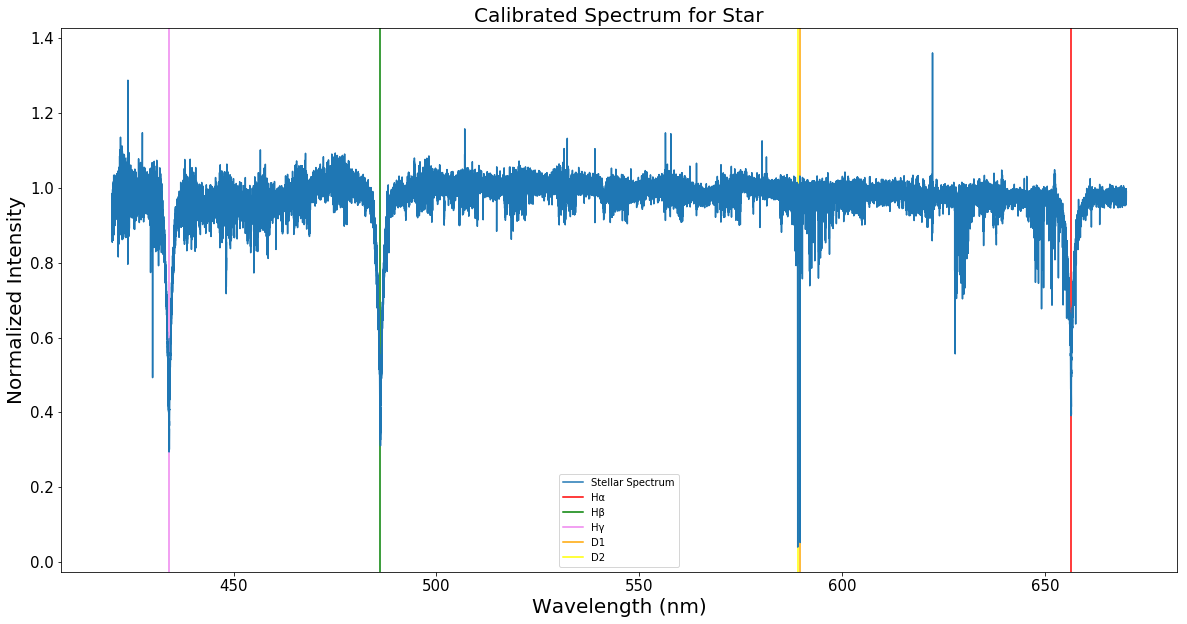

In [12]:
plt.figure(figsize=(20,10))

# Plot range of data
minmax = (wl > 420) & (wl < 670)
plt.plot(wl[minmax], I[minmax], zorder=99, label='Stellar Spectrum')

# Balmer Lines and Sodium Lines
Balmer = {"Hα":656.3, "Hβ":486.1, "Hγ":434.0}
cBalmer = ['red', 'green', 'violet']
Sodium = {"D1":589.5, "D2":589.0}
cSodium = ['orange', 'yellow']


# Plot vertical lines
for l, c in zip(Balmer, cBalmer):
    plt.axvline(Balmer[l], c=c, label=l)
for l, c in zip(Sodium, cSodium):
    plt.axvline(Sodium[l], c=c, label=l)

# Labelling
plt.legend(loc='best')
plt.ylabel("Normalized Intensity", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.title("Calibrated Spectrum for Star", fontsize=20)
plt.tick_params(labelsize=15)

plt.show()

The red lines represent the Balmer Series lines, and the orange represents the Fraunhofer (Sodium) Lines, which are the most prominent absorption features in this spectrum.

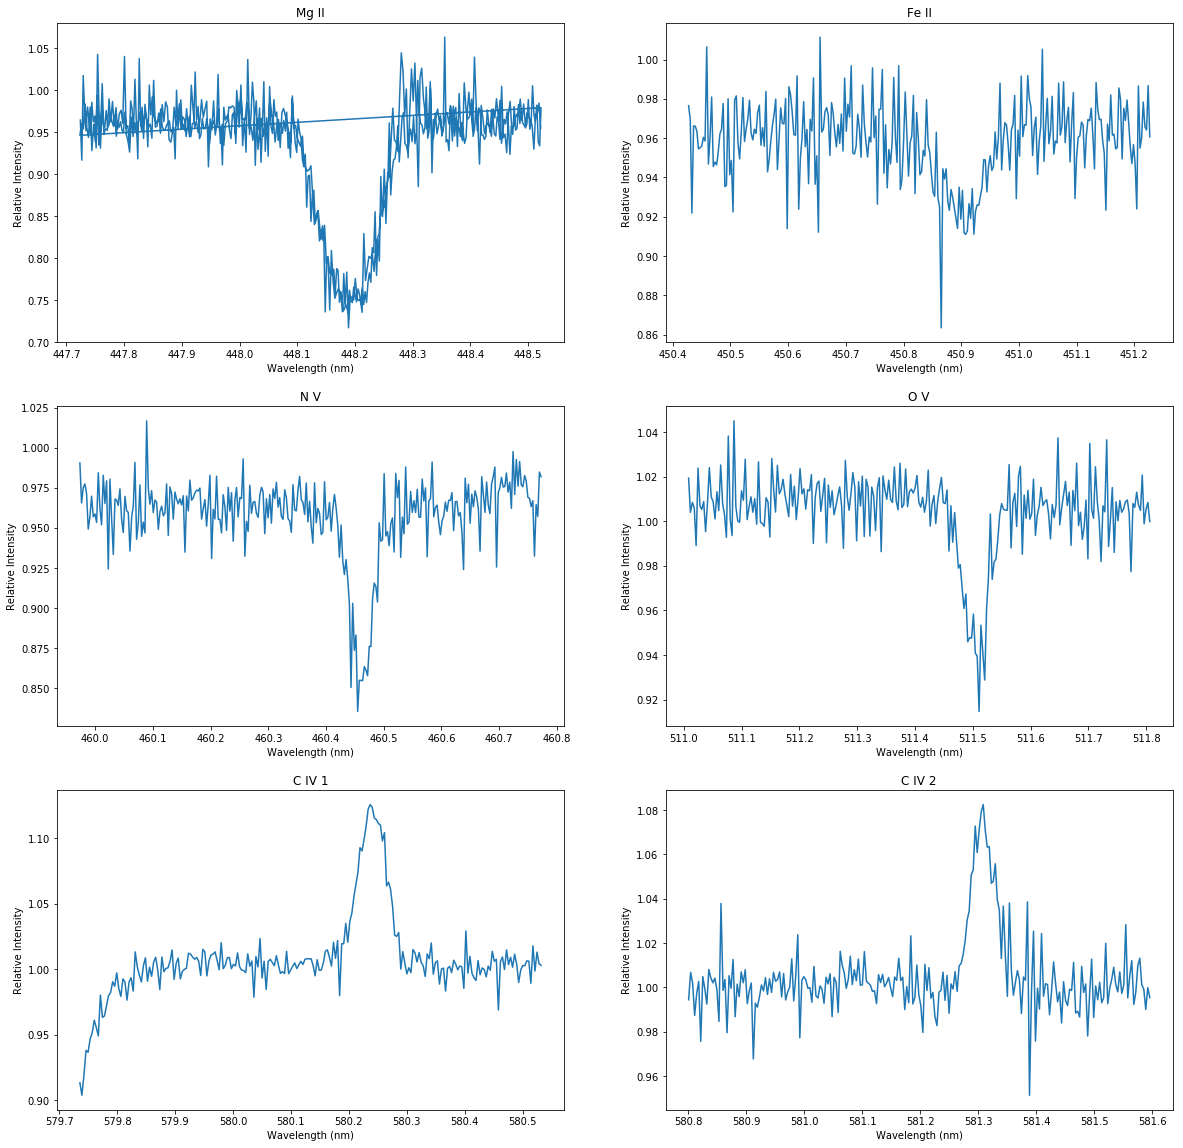

In [11]:
# Define Lines
lines = {"Mg II":448.1228, "Fe II":450.827, "N V":460.373, 
         "O V":511.407, "C IV 1":580.133, "C IV 2":581.198}

i=1 # Used for subplots

# Generate Figure
fig = plt.figure(figsize=(20,20))

for l in lines:
    ax = fig.add_subplot(3,2,i)
    
    minmax = (wl > lines[l] - 0.4) & (wl < lines[l] + 0.4)
    ax.plot(wl[minmax], I[minmax])
    
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Relative Intensity")
    plt.title(l)
    
    i += 1

plt.show()

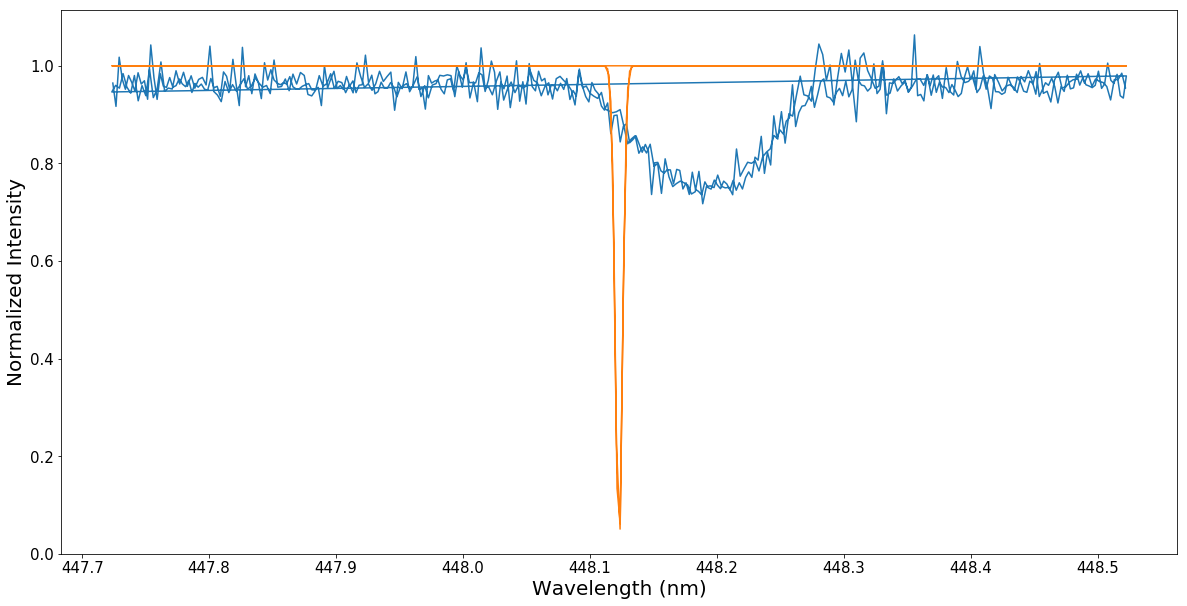

In [12]:
# Grab MgII wavelength
MgII = lines["Mg II"]

# Slice range
minmax = (wl > MgII - 0.4) & (wl < MgII + 0.4)
x = wl[minmax]

# Generate Gaussian using Sigma from FWHM, centered on MgII
FWHM = MgII / 68000
sigma = FWHM / 2.355
gauss = - np.exp(- (x - MgII) ** 2 / (2 * sigma ** 2)) + 1

# Generate Plot
plt.figure(figsize=(20,10))
plt.plot(x, I[minmax])
plt.plot(x, gauss)

# Labelling
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Normalized Intensity", fontsize=20)
plt.tick_params(labelsize=15)

plt.show()

The orange is what we expect to see based on the resolution of the telescope. As you can see, there is significant broadening as well as a redshift. The broadening is likely from stellar rotational velocity, as well as from the surface gravity.